# The Spark Foundation: Data Science And Business Analytics Tasks


 Task 3: Exploratory Data Analysis - Retail

Author :Zienab Abdelrahman

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df= pd.read_csv(r"C:\Users\Lenovo\Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [42]:
df.shape

(9994, 13)

In [43]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [44]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Data Cleaning

In [46]:
df.duplicated().sum()

17

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [49]:
df_cat = df[[ 'Ship Mode',
             'Segment', 'Country', 'City', 'State', 'Region',
              'Category', 'Sub-Category']]
df_cat.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [50]:
for feature in df_cat.columns:
    print(feature,':',df[feature].nunique())

Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Category : 3
Sub-Category : 17


In [51]:
cat_sales=df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(cat_sales)

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64


In [52]:
cat_profit=df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print(cat_profit)

Category
Technology         145454.9481
Office Supplies    122364.6608
Furniture           18421.8137
Name: Profit, dtype: float64


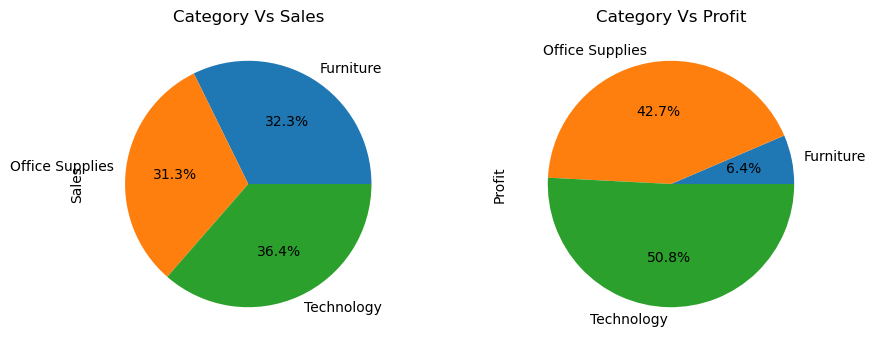

In [53]:
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.1f%%")
plt.title("Category Vs Sales")
plt.subplot(1, 2, 2)
df.groupby("Category")["Profit"].sum().plot.pie(autopct = "%1.1f%%")
plt.title("Category Vs Profit")
plt.show()

In [54]:
subcat_sales=df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
print(subcat_sales)

Sub-Category
Phones         330007.0540
Chairs         327777.7610
Storage        223843.6080
Tables         206965.5320
Binders        203409.1690
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91683.0240
Paper           78224.1420
Supplies        46673.5380
Art             27107.0320
Envelopes       16476.4020
Labels          12444.9120
Fasteners        3024.2800
Name: Sales, dtype: float64


In [55]:
subcat_profit=df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)
print(subcat_profit)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Chairs         26567.1278
Storage        21278.8264
Appliances     18138.0054
Furnishings    13052.7230
Envelopes       6964.1767
Art             6524.6118
Labels          5526.3820
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


<AxesSubplot:title={'center':'Sub_categors VS Profit'}, xlabel='Sub-Category'>

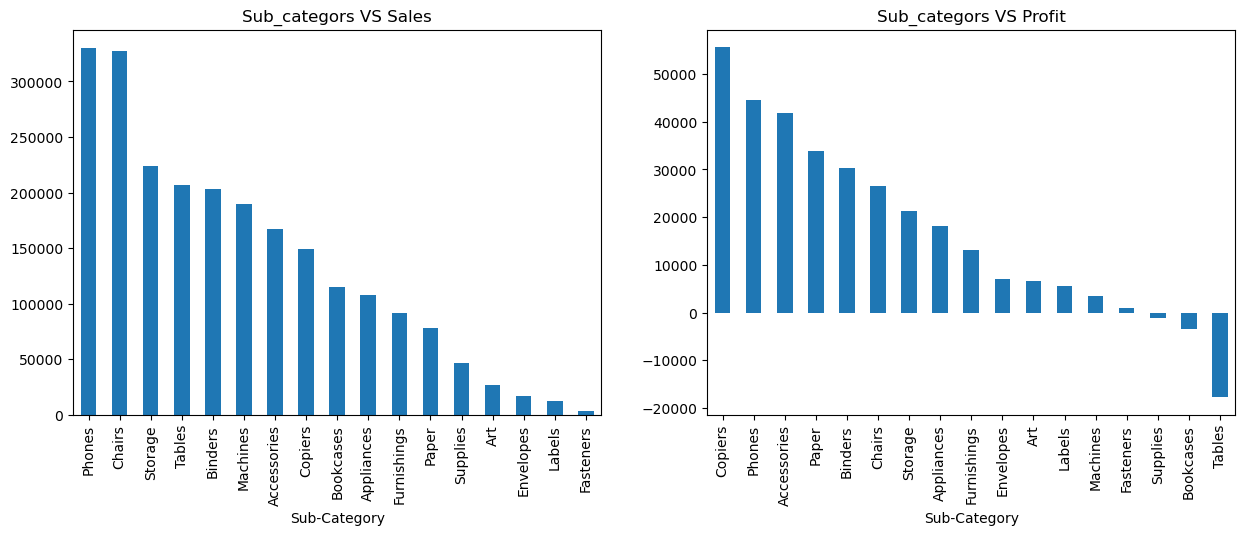

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

subcat_sales=df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
subcat_sales.plot(kind="bar",ax=ax1,title="Sub_categors VS Sales")
subcat_sales1=df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)
subcat_sales1.plot(kind="bar",ax=ax2,title="Sub_categors VS Profit")


In [57]:
top_5_selling_subproducts=subcat_sales[:5]
print(top_5_selling_subproducts)

Sub-Category
Phones     330007.054
Chairs     327777.761
Storage    223843.608
Tables     206965.532
Binders    203409.169
Name: Sales, dtype: float64


In [58]:
top_5_subproducts_achieve_profit=subcat_profit[:5]

In [59]:
top_5_subproducts_achieve_profit.index


Index(['Copiers', 'Phones', 'Accessories', 'Paper', 'Binders'], dtype='object', name='Sub-Category')

In [60]:
top_5_subproducts_achieve_profit.index==top_5_selling_subproducts.index

array([False, False, False, False,  True])

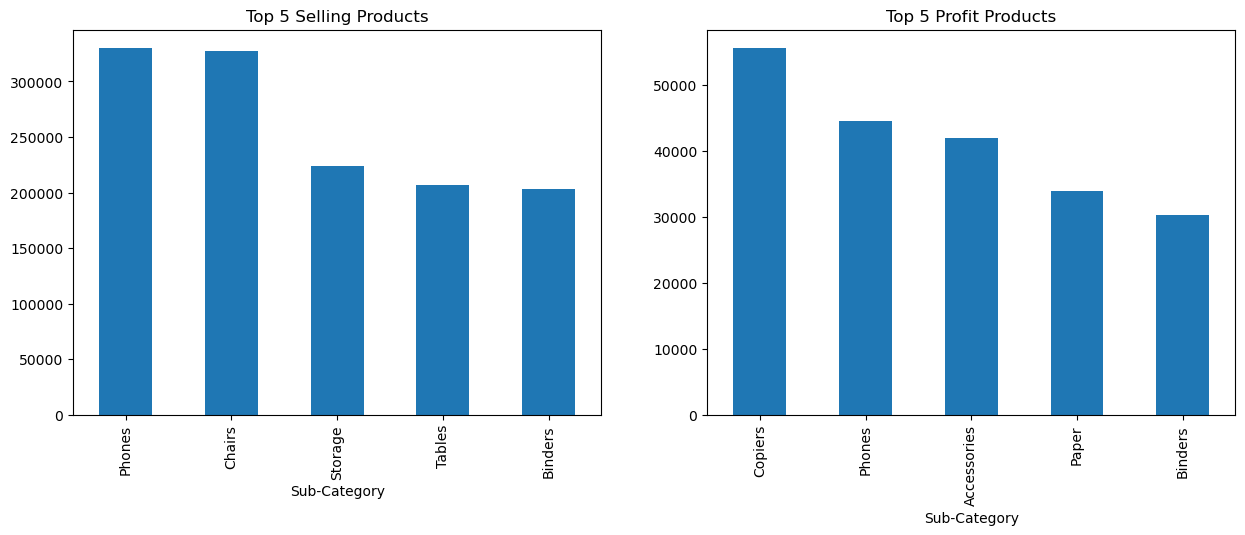

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot the top 5 selling products in the first column
top_5_selling_subproducts.plot(kind="bar", y="Sales", ax=ax1)

# Set the title for the first plot
ax1.set_title("Top 5 Selling Products")

# Plot the top 5 profit products in the second column
top_5_subproducts_achieve_profit.plot(kind="bar", y="Profit", ax=ax2)

# Set the title for the second plot
ax2.set_title("Top 5 Profit Products")

# Show the plot
plt.show()

In [62]:
# Now we can conclude some things :
# top_5_selling_products:
    # phones
    #chairs
    #storage
    #Tables
    #Binders
#top_5_profit_products:
   #Copiers
   #Phones
   #Accessories
   #paper
   #Binders
#top selling & profit category is :
  #Technology
#There is a big loss in selling tables , Bookcases and Supplies 
# The company should increase the number of copier sales to make more profit


In [63]:
Less_profit_products = df[(df['Sub-Category'] == 'Supplies') | (df['Sub-Category'] == 'Bookcases') |(df['Sub-Category'] == 'Tables')]
Less_profit_products

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
24,Standard Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044.6300,3,0.00,240.2649
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,Second Class,Corporate,United States,Los Angeles,California,90045,West,Furniture,Tables,273.5680,2,0.20,10.2588
9958,Standard Class,Home Office,United States,New Rochelle,New York,10801,East,Office Supplies,Supplies,7.3000,2,0.00,2.1900
9962,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9980,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.9800,1,0.00,22.3548


In [64]:
grouped_df6 = Less_profit_products.groupby(["Discount","Sub-Category"])["Profit"].sum().reset_index()
print(grouped_df6)   

    Discount Sub-Category      Profit
0       0.00    Bookcases   6075.7117
1       0.00     Supplies   1718.3942
2       0.00       Tables  13276.2997
3       0.15    Bookcases   1418.9915
4       0.20    Bookcases    130.5022
5       0.20     Supplies  -2907.4937
6       0.20       Tables   -303.5580
7       0.30    Bookcases   -555.8726
8       0.30       Tables  -3402.3276
9       0.32    Bookcases  -2391.1377
10      0.40       Tables -16187.3968
11      0.45       Tables  -2493.1111
12      0.50    Bookcases  -4255.8117
13      0.50       Tables  -8615.3873
14      0.70    Bookcases  -3894.9394


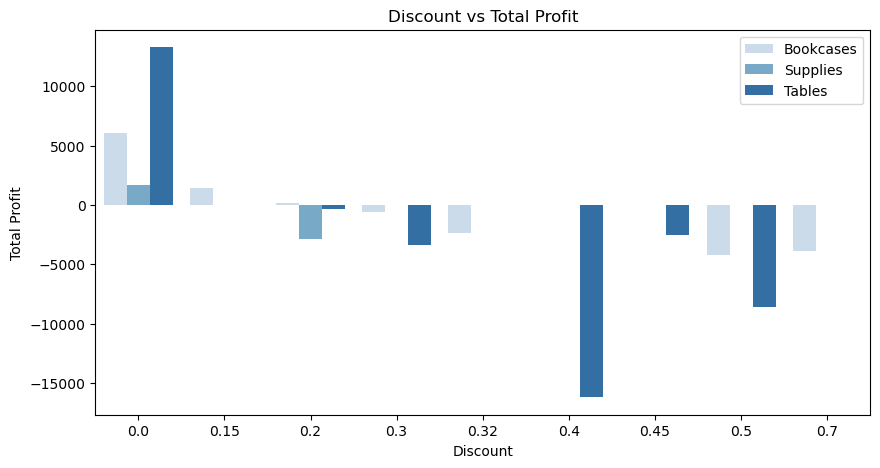

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df6, x='Discount', y='Profit', hue='Sub-Category',palette='Blues')
plt.xlabel("Discount")

plt.ylabel("Total Profit")
plt.title("Discount vs Total Profit")
plt.legend(loc='upper right')
plt.show()

In [66]:
#The big loss  in selling tables , Bookcases and Supplies is Due to Discount from(20%-70%)
# The discount of 30% or more causes a loss in Bookcases 
#The discount of 20% or more causes a loss in Supplies and Tables 

In [83]:
grouped_df6 = df.groupby(["Discount","Category"])["Profit"].sum().reset_index()
print(grouped_df6)

    Discount         Category       Profit
0       0.00        Furniture   58091.5585
1       0.00  Office Supplies  130404.4284
2       0.00       Technology  132348.4204
3       0.10        Furniture    7111.0119
4       0.10  Office Supplies    1086.0808
5       0.10       Technology     832.0843
6       0.15        Furniture    1418.9915
7       0.20        Furniture    6265.9491
8       0.20  Office Supplies   38008.0522
9       0.20       Technology   46032.6057
10      0.30        Furniture  -10683.2581
11      0.30       Technology     326.0395
12      0.32        Furniture   -2391.1377
13      0.40        Furniture  -16187.3968
14      0.40       Technology   -6869.6536
15      0.45        Furniture   -2493.1111
16      0.50        Furniture  -12871.1990
17      0.50       Technology   -7635.2291
18      0.60        Furniture   -5944.6552
19      0.70        Furniture   -3894.9394
20      0.70  Office Supplies  -16601.0984
21      0.70       Technology  -19579.3191
22      0.8

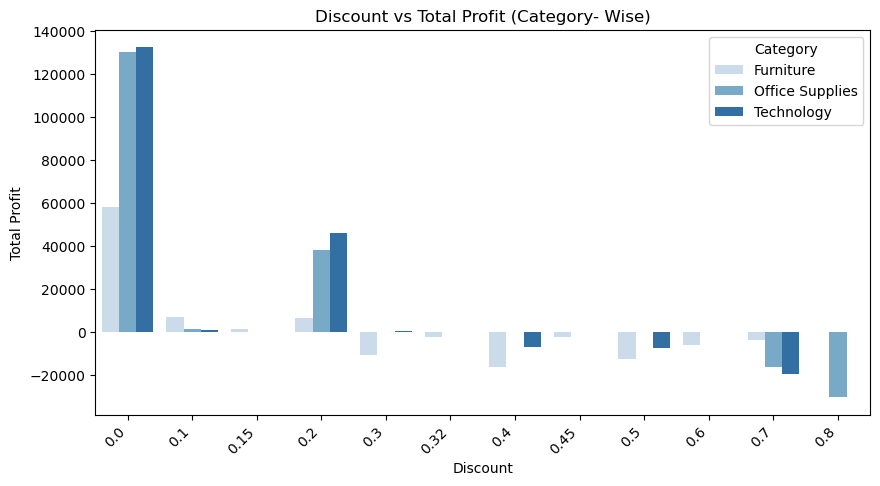

In [84]:
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df6, x='Discount', y='Profit', hue='Category',  palette='Blues')
plt.xlabel("Discount")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Profit")
plt.title("Discount vs Total Profit (Category- Wise)")
plt.legend(title="Category", loc='upper right')
plt.show()

In [85]:
# The discount of 30% or more on Furniture category causes a loss 
#The discount of 40% or more causes a loss on Technology Category
#The discount of 70% or more causes a loss on Office Supplies Category

<AxesSubplot:xlabel='Sub-Category'>

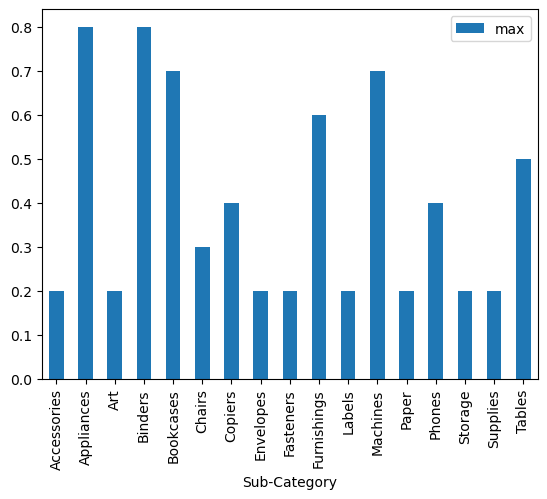

In [82]:
x=df.groupby(["Sub-Category"])["Discount"].agg([max])
x.plot(kind="bar")

In [ ]:
#Discount on Accessories,Appliances ,Art,Binders,Chairs,Copiers,Envelopes,Fasteners,Lables,Machines,Paper,Phones and Storage does not acheive loss in total profit

In [67]:
region_sales_profit = df.groupby("Region")[["Sales","Profit"]].agg([sum])
region_sales_profit

,Sales,Profit
,sum,sum
Region,,
Central,500782.8528,39655.8752
East,678435.1960,91506.3092
South,391721.9050,46749.4303
West,725255.6365,108329.8079


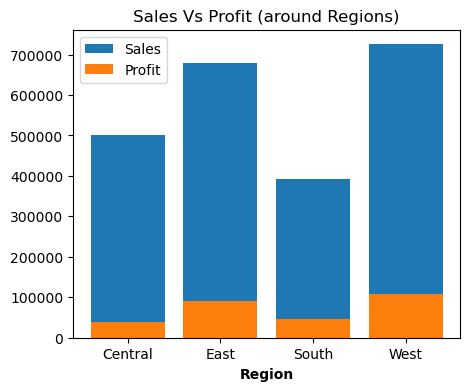

In [68]:
fig = plt.figure(figsize = (5, 4))
plt.bar(region_sales_profit.index, region_sales_profit["Sales"]["sum"],  label = 'Sales')
plt.bar(region_sales_profit.index, region_sales_profit["Profit"]["sum"],   label = 'Profit')
plt.xlabel('Region', fontweight ='bold', fontsize = 10)
plt.legend()
plt.title("Sales Vs Profit (around Regions)")
plt.show()

In [69]:
#West is the most region that acheive profit and sales


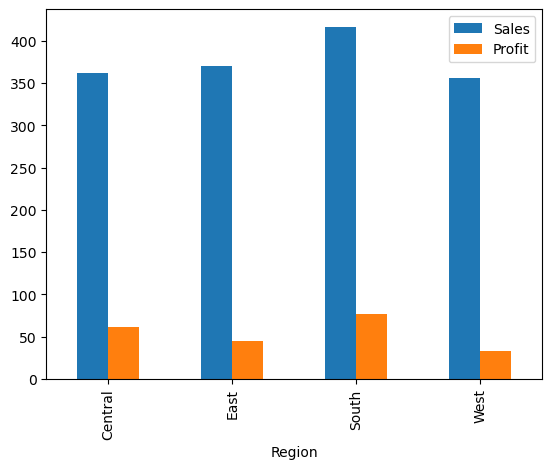

In [80]:
product = df[df["Sub-Category"] == "Phones"] #filter 

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Ploting
region_group.plot(kind="bar")

plt.show()

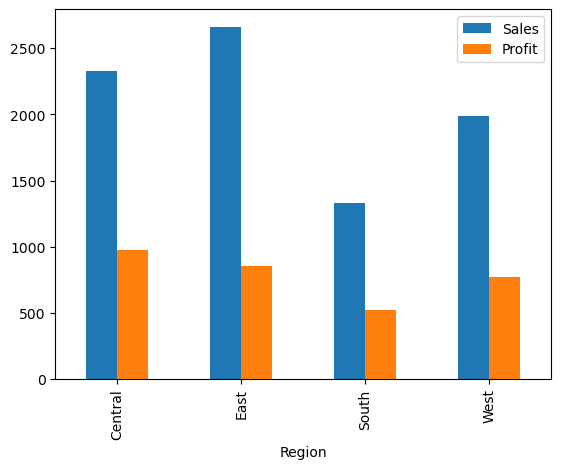

In [71]:

product = df[df["Sub-Category"] == "Copiers"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Ploting
region_group.plot(kind="bar")

plt.show()

In [ ]:
#Suggestion: The company can increase the number of copier products, because their selling rate is high in the east

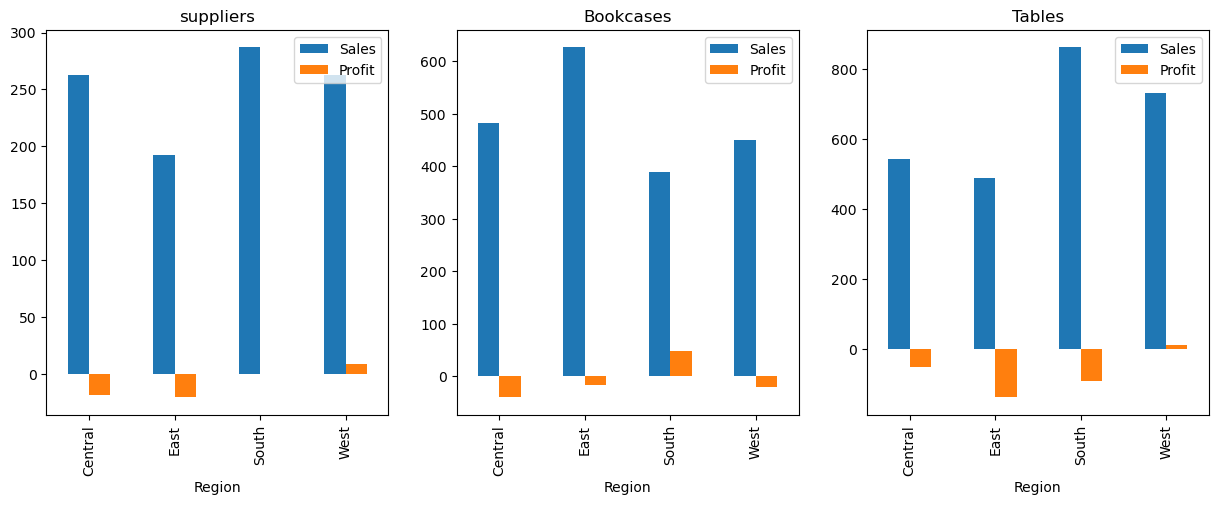

In [72]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
product = df[df["Sub-Category"] == "Supplies"]
product1 = df[df["Sub-Category"] == "Bookcases"]
product2 = df[df["Sub-Category"] == "Tables"]
# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]
region_group1 = product1.groupby(["Region"]).mean()[["Sales", "Profit"]]
region_group2 = product2.groupby(["Region"]).mean()[["Sales", "Profit"]]
# Ploting
# Ploting
region_group.plot(kind="bar",ax=ax1,title="suppliers")
region_group1.plot(kind="bar",ax=ax2,title="Bookcases")
region_group2.plot(kind="bar",ax=ax3,title="Tables")




plt.show()

In [102]:
product = df[(df["Sub-Category"] == "Bookcases") & (df["Region"] == "South")]
product

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1302,Second Class,Home Office,United States,Arlington,Virginia,22204,South,Furniture,Bookcases,61.960,2,0.0,4.3372
1386,Same Day,Home Office,United States,Smyrna,Georgia,30080,South,Furniture,Bookcases,239.980,2,0.0,52.7956
1932,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Bookcases,145.740,3,0.0,23.3184
2262,First Class,Consumer,United States,Arlington,Virginia,22204,South,Furniture,Bookcases,359.970,3,0.0,79.1934
2471,Standard Class,Consumer,United States,Fayetteville,North Carolina,28314,South,Furniture,Bookcases,451.136,4,0.2,-67.6704
2860,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Furniture,Bookcases,1628.820,9,0.0,374.6286
3999,Second Class,Corporate,United States,Port Saint Lucie,Florida,34952,South,Furniture,Bookcases,231.920,5,0.2,5.7980
4088,Standard Class,Consumer,United States,Jonesboro,Arkansas,72401,South,Furniture,Bookcases,638.820,9,0.0,172.4814
4423,First Class,Corporate,United States,Sandy Springs,Georgia,30328,South,Furniture,Bookcases,302.940,3,0.0,75.7350


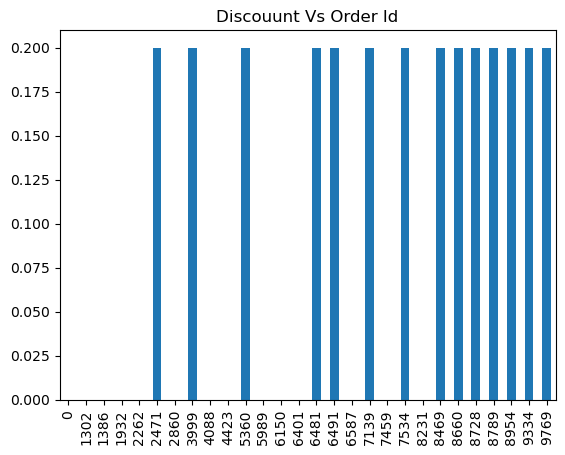

In [103]:

x=product.groupby(["Sub-Category"])["Discount"]
x.plot(kind="bar",title="Discouunt Vs Order Id")

plt.show()

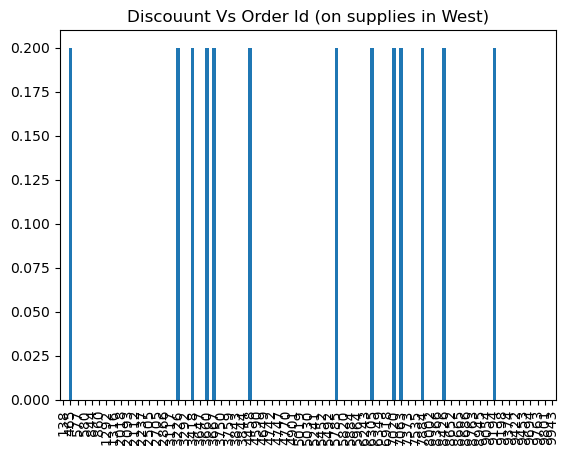

In [105]:
product1 = df[(df["Sub-Category"] == "Supplies") & (df["Region"] == "West")]
xx=product1.groupby(["Sub-Category"])["Discount"]
xx.plot(kind="bar",title="Discouunt Vs Order Id (on supplies in West)")
plt.show()

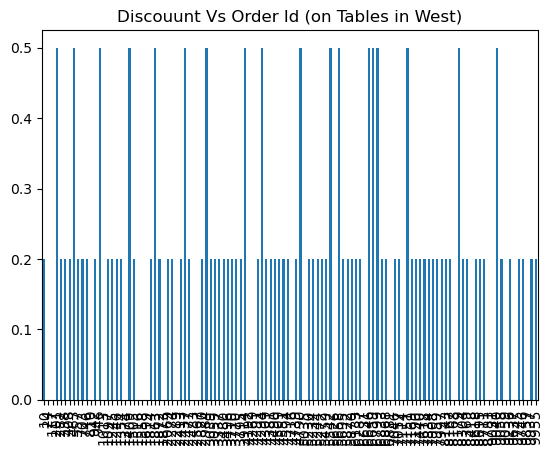

In [107]:
product11 = df[(df["Sub-Category"] == "Tables") & (df["Region"] == "West")]
xxx=product11.groupby(["Sub-Category"])["Discount"]
xxx.plot(kind="bar",title="Discouunt Vs Order Id (on Tables in West)")
plt.show()

In [ ]:
#Bookcases in south does not make loss because the Discount does not exceed than 20%
#Supplies in West does not make loss because the Discount does not exceed than 20%
#Tables in West does not make loss because the Discount does not exceed than 50%

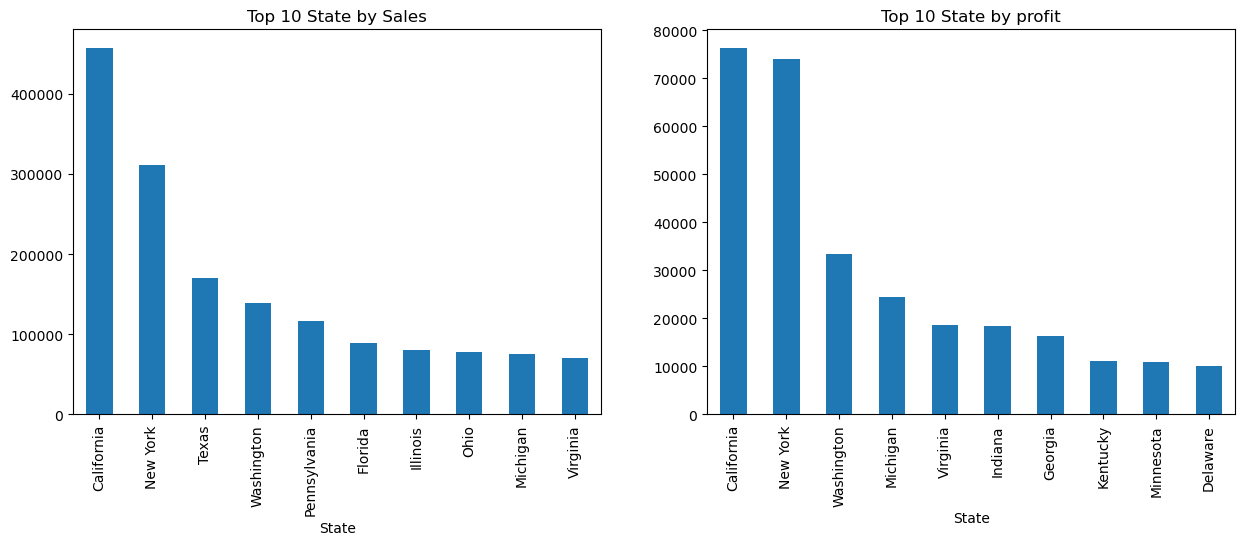

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
x=df.groupby("State").Sales.sum().sort_values(ascending = False).head(10)
x.plot(kind="bar",ax=ax1,title="Top 10 State by Sales")
y=df.groupby("State").Profit.sum().sort_values(ascending = False).head(10)
y.plot(kind="bar",ax=ax2,title="Top 10 State by profit")

plt.show()